In [33]:
# Initialize Otter
import otter
grader = otter.Notebook("Linear transforms.ipynb")

# Matrix Analysis 2024 - EE312
## Week 2  - Linear transforms
[N. Aspert](https://people.epfl.ch/nicolas.aspert) - [LTS2](https://lts2.epfl.ch)

The first week notebook (introduction to Python, Numpy and Matplotlib) can be used as a help.

## Important
You need to submit *individually* your answers on moodle before the next exercise session. For the theoretical questions you can either fill the notebook or write it on a separate sheet (if you are not comfortable with Markdown/TeX) and upload a scanned version. 

## Objective

The end goal is to understand purely algebraic, matrix based, view of a few linear transforms. You will use those linear transform to perform some basic time-frequency analysis of signals.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

## Part I - Fourier

<!-- BEGIN QUESTION -->

1. Prove that any set of orthogonal vectors $v_i \in \mathbb{C}^N, \, i=1, \ldots , M \leq N$ such that $v_i^H v_j = C \delta_{i,j}$ is linearly independent (where $C$ is some constant).

If we suppose that they are linearly dependant and therefore: $\exists \alpha_k$ such as $v_i = \sum_{k=1}^M\alpha_kv_k(1-\delta_{i, k})$ Now since we have $v_i^Hv_j = C\delta_{i,j} \implies v_i^Hv_i = C$ Therefore:
$$C = v_i^H\sum_{k=1}^M\alpha_k v_k(1-\delta_{i,k}) = \sum_{k=1}^M\alpha_k v_i^Hv_k(1-\delta_{i,k}) = \sum_{k=1}^M\alpha_k C\delta_{i,k}(1-\delta_{i,k}) = 0\cdot C$$
This only holds for $C=0$ and it is a contradiction since we assumed $C\neq 0$ in the beginning. Therefore the set of orthogonal vectors $v_i$ is linearly independent.

<!-- END QUESTION -->
---
<!-- BEGIN QUESTION -->

2. Compute $a_r = \sum_{n=0}^{N-1}e^{j2\pi r\frac{n}{N}}$, where $r$ is an integer (discuss the result depending on the value of $r$).

We can see that it is a geometric sum therefore:
$$a_r = \sum_{n=0}^{N-1}e^{\left(\frac{j2\pi r}{N}\right)n} = \frac{1-e^{j2\pi r}}{1 - e^{\frac{j2\pi r}{N}}}$$
The denominator becomes zero if $r = kN \,\,\forall k\in\Z$ is a multiple of N, so in this case the expression becomes:
$$a_r = \sum_{n=0}^{N-1}1 = N$$
For all other integers $r$ the expression becomes zero because the denominator is zero.

<!-- END QUESTION -->
---
<!-- BEGIN QUESTION -->

3. Let $v_k \in \mathbb{C}^N$ be such that $v_k[n] = e^{-j 2 \pi \frac{kn}{N}}$, for $k,n = 0, \ldots , N-1$. 
- Prove that these vectors are mutually orthogonal, hence linearly independent. 
- Compute the norm of $v_k$.

We can say $\quad v_k = \begin{bmatrix}e^{-j2\pi\frac{k\cdot 0}{N}} & e^{-j2\pi\frac{k\cdot 1}{N}} & \ldots\end{bmatrix}^T$  and: $\quad v_l = \begin{bmatrix}e^{-j2\pi\frac{l\cdot 0}{N}} & e^{-j2\pi\frac{l\cdot 1}{N}} & \ldots\end{bmatrix}^T$
$$v_k^H \cdot v_l = \sum_{n=0}^N e^{j2\pi\frac{k\cdot n}{N}}e^{-j2\pi\frac{l\cdot n}{N}} = \sum_{n=0}^N e^{\frac{j2\pi n}{N}(k-l)}$$
So we have the same expression as in 2) with $r = k-l$, as $k, l < N$ we know that $k-l < N$ and therefore we get no multiples of $N$ for $r$ except for the trivial case $r=0 \implies k=l$. We get:

Therefore we obtain $v_k^H \cdot v_l = C \delta_{k,l}$ As stated in question 1) this defines a set of orthognal vectors.

The norm of $v_k$ is the root of the hermitian product $|v_k| = \sqrt{\langle v_k, v_k\rangle_H} = \sqrt{N}\;$ see question 2). 

<!-- END QUESTION -->
---
4. Implement the function `get_fourier_matrix` that returns a normalized Fourier matrix of size $N\times N$. Do not make use of the builtin DFT/FFT functions in `numpy` or `scipy`. Raise a `ValueError` exception if a ngetive or zero $N$ value is supplied.

In [35]:
def get_fourier_matrix(N):
    if N <= 0:
        raise ValueError("N must be a positive integer")
    # Create the matrix
    F = np.zeros((N, N), dtype=complex)
    for i in range(N):
        for j in range(N):
            F[i, j] = np.exp(-2j * np.pi * i * j / N) / np.sqrt(N)
    return F

In [36]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, your implementation returns correct results
q4 - 2 message: Good, you did not use the scipy.linalg.dft function
q4 - 3 message: Good, you did not use the scipy.fft.fft function
q4 - 4 message: Good, you did not use the numpy.fft.fft function
q4 - 5 message: Good, your implementation returns an orthogonal matrix
q4 - 6 message: Good, you properly validated size before computing the result

Let us now generate two test signals. 

The first one $x_1(t)$ is made of four piecewise sinusoids, of different frequencies:

$$
x_1(t) = \cos(2\pi 5t), 0\le t < 2\\
x_1(t) = \cos(2\pi 10t), 2\le t < 4\\
x_1(t) = \cos(2\pi 25t), 4\le t < 6\\
x_1(t) = \cos(2\pi 50t), 6\le t < 8\\
$$


In [37]:
Fs = 256 # sampling frequency
t = np.arange(0, Fs*8)/Fs
x1 = np.zeros(Fs*8)
x1[0:Fs*2] = np.cos(2*np.pi*5*t[0:Fs*2])
x1[Fs*2:Fs*4] = np.cos(2*np.pi*10*t[Fs*2:Fs*4])
x1[Fs*4:Fs*6] = np.cos(2*np.pi*25*t[Fs*4:Fs*6])
x1[Fs*6:Fs*8] = np.cos(2*np.pi*50*t[Fs*6:Fs*8])

The second signal $x_2(t)$ is the sum of the same sinusoids over the complete time interval, with a scaling term s.t. the amplitude of both signals is identical.

In [38]:
x2 = 0.25*(np.cos(2*np.pi*5*t) + np.cos(2*np.pi*10*t) + np.cos(2*np.pi*25*t) + np.cos(2*np.pi*50*t))

<!-- BEGIN QUESTION -->

5. 
- Display the generated signals using `plt.plot`. 
- Compute their Fourier transforms using the Fourier matrix generate at the previous question.
- Display the amplitude of their Fourier spectrum. What do you observe ? 

$x_1(t)$ is a function defined per interval, therefore at the border between two intervals, we add some distortion due to the aprupt change between signals. It is not a true sum of sinusoids, so the FT of the sum is not the sum of the FTs. We can still see quite clearly all the involved frequencies, just with some added noise. 

$x_2(t)$ is a true superposition (sum) of sinusoidal waves, as explained before, in this case the sum of the FTs of the sinusoids is the FT of the signal and therefore we get the typical distinctive peaks at the frequencies (positive and negative) of the sinusoids. There is no noise in this case.

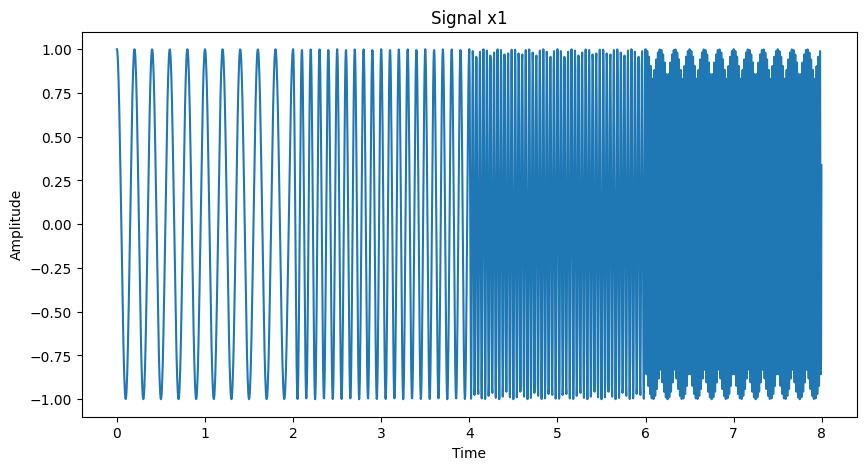

In [39]:
# plot x1
plt.figure(figsize=(10, 5))
plt.plot(t, x1, label='x1')
plt.title('Signal x1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

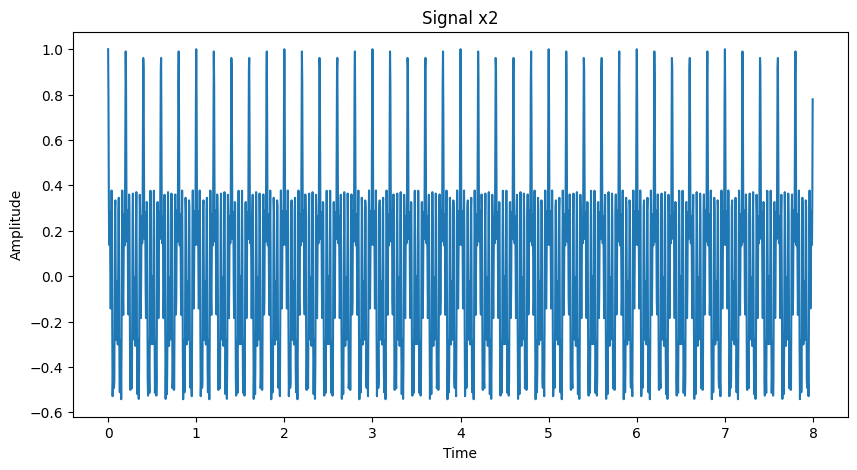

In [40]:
# plot x2
plt.figure(figsize=(10, 5))
plt.plot(t, x2, label='x2')
plt.title('Signal x2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [41]:
# Compute the Fourier transform of x1 and x2
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)

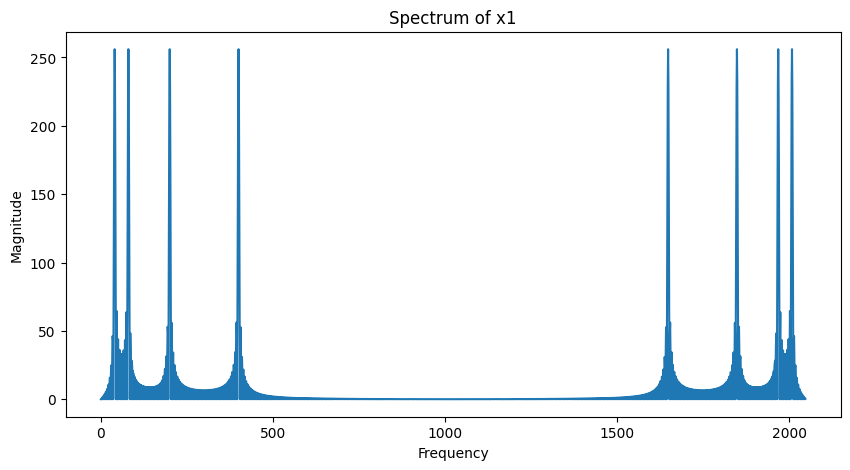

In [42]:
# Plot the spectrum of x1
plt.figure(figsize=(10, 5))
plt.plot(np.abs(X1))
plt.title('Spectrum of x1')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

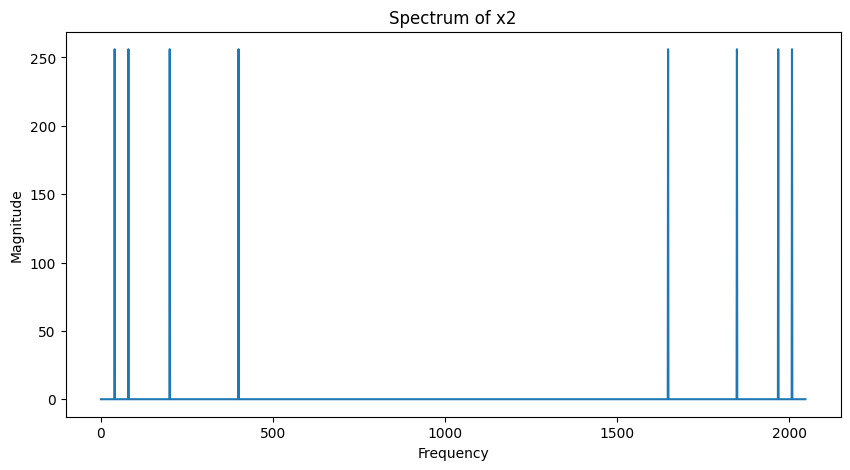

In [43]:
# Plot the spectrum of x2
plt.figure(figsize=(10, 5))
plt.plot(np.abs(X2))
plt.title('Spectrum of x2')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

<!-- END QUESTION -->

In order to have a better compromise between time and frequency, the input signal will be split in smaller non-overlapping blocks of length $p$, and we will perform the DFT of each block.

6. Using the `get_fourier_matrix` implemented previously, fill the `get_block_dft_matrix` function below s.t. it returns a $N\times N$ matrix that will perform the block Fourier transform when applied to an input vector. Raise a `ValueError` if $p$ does not divide $N$.

Hint: [numpy.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html#numpy.pad) and/or [numpy.kron](https://numpy.org/doc/stable/reference/generated/numpy.kron.html) might prove useful.

In [44]:
def get_block_dft_matrix(N, p):
    if N % p != 0:
        raise ValueError("N must be divisible by p")
    # Create the matrix
    A = np.eye(int(N/p), dtype=complex)
    B = get_fourier_matrix(p)
    return np.kron(A, B)

In [45]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Good, your implementation returns an orthogonal matrix
q6 - 2 message: Good, you properly validated size before computing the result
q6 - 3 message: Good, your implementation returns the correct result

<!-- BEGIN QUESTION -->

We will now use this block Fourier transform to how the frequencies of the signal evolve through time.

7. 
- Using the `reshape` and `plt.imshow` functions, display the amplitude of the result of the block Fourier transform of $x_1$ and $x_2$. Is the result improved when compared to the one observed in question 5 ?
- What is the influence of parameter $p$ ? 


If we increase the parameter $p$ we get more resolution in the frequency domain but we lose precision in the time-space, so we need to take a reasonable value for $p$ in order to get a result that makes sense.

In [46]:
# Compute the block DFT matrix Wb
N = 8*Fs
p = 64
Wb = get_block_dft_matrix(N, p)

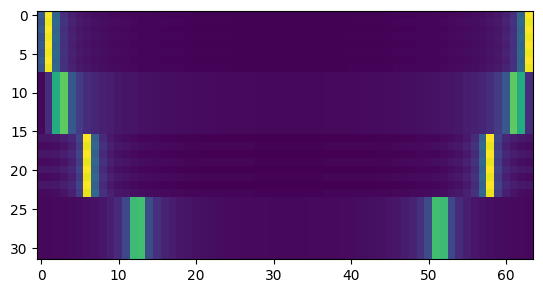

In [47]:
# Plot the block DFT of x1
plt.imshow(np.reshape(np.abs(Wb@x1), (N//p, p)))
plt.show()

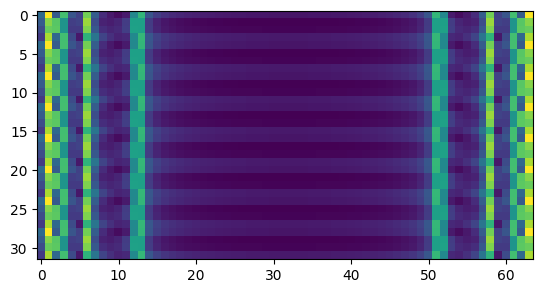

In [48]:
# Plot the block DFT of x2
plt.imshow(np.reshape(np.abs(Wb@x2), (N//p, p)))
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

8. In a real-world application, would generating a $N\times N$ matrix to perform the block Fourier transform be a good way to implement it ? (Justify)

No because all blocks of the matrix are equal, so there is a lot of redundancy, we could just take smaller blocks of the signal and apply a smaller fourier matrix to obtain the same result with less computing power and memory usage. Also there are effects due to the border of the blocks, that add some distortion, this could be avoided by applying different weights. 

<!-- END QUESTION -->

## Part II - Haar transform

In this part we will study another approach to study the time/frequency properties of signals. 

Let us consider a vector $x\in\mathbb{R}^N$, with $N$ being even. The single-level Haar transform decomposes $x$ into two vectors $a^1$ and $d^1$ belonging to $\mathbb{R}^{\frac{N}{2}}$. 

The coefficients of $a^1$ are defined as follows: $a^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} + x_{2n}), n=1, ..., \frac{N}{2}$. $a^1$ is referred to as the *average coefficients vector*.

The coefficients of $d^1$ are defined as follows: $d^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} - x_{2n}), n=1, ..., \frac{N}{2}$. $d^1$ is referred to as the *detail coefficients vector*.


<!-- BEGIN QUESTION -->

9. Let us represent the single-level Haar transform by a matrix $H_1$ s.t. 
$$
H_1 x = \begin{pmatrix}a^1 \\ d^1\end{pmatrix}
$$
Prove that $H_1$ is orthonormal.

1) For $N=2$ we have the following matrix:
$$H_1 = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$
Orthonormal matrices verify the condition $H_1^TH_1 = I$ 
$$H_1^TH_1 = \frac{1}{2}\begin{bmatrix}1&1\\1&-1\end{bmatrix}\begin{bmatrix}1&1\\1&-1\end{bmatrix} = \begin{bmatrix}1&0\\0&1\end{bmatrix} = I$$

2) For $N=4$ we get:
$$H_1 = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1&0&0\\0&0&1&1\\1&-1&0&0\\0&0&1&-1\end{bmatrix}$$ 
Where we also get $H_1^TH_1 = I$

3) In general we want to show: $a_1^i\cdot a_1^i = d_1^i\cdot d_1^i = 1\quad\forall i\in 1, \ldots\frac{N}{2}$
    
as well as $a_1^i\cdot a_1^j = a_1^i\cdot d_1^i = d_1^i\cdot d_1^j = 0\quad\forall i,j \in 1,\ldots\frac{N}{2}\,\,i\neq j$

We can verify these egalities easily by seeing that the nonzero coefficients in the rows of the matrix $H$ are  at disjoint locations. Therefore all single level Haar matrices are orthonormal.

<!-- END QUESTION -->

10. Write a function that returns the single-level Haar transform matrix $H_1$ for a given $N$. Raise a `ValueError` if $N$ is invalid.

In [49]:
def get_sl_haar_matrix(N):
    if N%2 != 0 or N <= 0:
        raise ValueError("N must be even")
    # Create the matrix
    A = np.zeros((N, N))
    for i in range(N//2):
        A[i, 2*i] = 1
        A[i, 2*i+1] = 1
        A[N//2+i, 2*i] = 1
        A[N//2+i, 2*i+1] = -1
    return A/np.sqrt(2)

In [50]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 1 message: Good, you properly validated size before computing the result
q10 - 2 message: Good, results look correct
q10 - 3 message: Good, computed matrix is orthogonal

The multi-level Haar transform is defined by recursively applying the single-level transform **to the average coefficient parts**. 

For instance constructing 2-level Haar transform over $N$ points start with the previously defined $H_{1,N}$ matrix of size $N\times N$ and the corresponding $\frac{N}{2}\times\frac{N}{2}$ version denoted by $H_{1,\frac{N}{2}}$. 

$H_{1,N}$ can be written as
$$
\begin{pmatrix} H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$
where $H_{1, N}^a$ and $H_{1,N}^d$ are respectively the average and detail coefficient matrices, both of size $\frac{N}{2}\times N$.

Following these notations, the 2-level Haar transform matrix $H_{2,N}$ can be written as:
$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$

11. Implement a function that returns the $H_{p,N}$ matrix of size $N\times N$ that performs a $p$-level haar transform. Raise a `ValueError` if the size and the level are incompatible, or if the level is smaller than 1.

In [51]:
def get_haar_matrix(N, level):
    if level <= 0 or N < 2**level:
        raise ValueError("Size and level incompatible")
    if level == 1:
        return get_sl_haar_matrix(N)
    up = get_haar_matrix(N//2, level-1)@get_haar_matrix(N, level-1)[:N//2]
    down = get_haar_matrix(N, level-1)[N//2:]
    return np.vstack((up, down))


In [52]:
grader.check("q11")

q11 results: All test cases passed!
q11 - 1 message: Good, you properly validated size/level before computing the result
q11 - 2 message: Good, results look correct
q11 - 3 message: Good, matrix is orthogonal

<!-- BEGIN QUESTION -->

12. Prove that $H_{p,N}$ is orthonormal.

1) We already proved the orthonoramality for $p=1$ (previous question), so to do an induction, we need to shot that:

Haar transform for $p=P$ is orthonormal $\implies$ Haar transform for $p = P+1$ is orthonormal. So we suppose, the Haar-transform for $p=P$ is orthonormal and prove that for $p = P+1$ it is orthonormal too.

So we want to show:
$$H_{p+1,N}H_{p+1,N}^T = \begin{bmatrix}H_{p,\frac{N}{2}}H^a_{p,N}\\H^d_{p,N}\end{bmatrix}\begin{bmatrix}H_{p,\frac{N}{2}}H^a_{p,N}\\H^d_{p,N}\end{bmatrix}^T = I$$

To simplify the notation we define $X = H_{p,\frac{N}{2}}H^a_{p,N}\;$ and $Y = H^d_{p,N}\;$ we get:

$$I = \begin{bmatrix}X\\Y\end{bmatrix}\begin{bmatrix}X\\Y\end{bmatrix}^T = \begin{bmatrix}X\\Y\end{bmatrix}\begin{bmatrix}X^T&Y^T\end{bmatrix} = \begin{bmatrix}XX^T&XY^T\\YX^T&YY^T\end{bmatrix}$$

We have now four $\frac{N}{2}\times\frac{N}{2}$ blocks for which we have to verify the following conditions: $XX^T = XY^T = \mathbf{I}_{\frac{N}{2}}\;$ and $XY^T = YX^T = \mathbf{0}_{\frac{N}{2}}\;$ with $\mathbf{I}_{\frac{N}{2}}\;$ and $\mathbf{0}_{\frac{N}{2}}\;$ being the identity resp. null matrix of $\R^{\frac{N}{2}}$

Proof of the second equality:
$$XY^T = H_{p,\frac{N}{2}} H^a_{p,N} (H^d_{p,N})^T = H_{p,\frac{N}{2}}\cdot\mathbf{0}_{\frac{N}{2}} = \mathbf{0}_{\frac{N}{2}}$$
$$YX^T = H^d_{p,N}(H_{p,\frac{N}{2}} H^a_{p,N})^T = H^d_{p,N}(H^a_{p,N})^T(H_{p,\frac{N}{2}})^T = \mathbf{0}_{\frac{N}{2}}\cdot(H_{p,\frac{N}{2}})^T = \mathbf{0}_{\frac{N}{2}}$$
Proof of the first equality:
$$XX^T =  H_{p,\frac{N}{2}} H^a_{p,N} (H_{p,\frac{N}{2}} H^a_{p,N})^T =  H_{p,\frac{N}{2}} H^a_{p,N} (H^a_{p,N})^T (H_{p,\frac{N}{2}})^T = H_{p,\frac{N}{2}} \mathbf{I}_{\frac{N}{2}} (H_{p,\frac{N}{2}})^T = H_{p,\frac{N}{2}} (H_{p,\frac{N}{2}})^T = \mathbf{I}_{\frac{N}{2}}$$
$$YY^T = H^d_{p,N} (H^d_{p,N})^T = \mathbf{I}_{\frac{N}{2}}$$
For all the proofs we only used the fact that the Haar matrix for $p = P$ is orthonormal and we could show that the Haar matrix for $p=P+1$ also is orthonormal, therefore we showed that for all $p$ and by the first proof also all $N$ (pair) we get:
$$H_{p,N}H_{p,N}^T = \mathbf{I}_{N}$$
And thus the multilevel Haar matrix is orthonormal.

<!-- END QUESTION -->

### Haar transform visualization

In order to make the visualization of the Haar decomposition easy, we provide you the `plot_haar_coeffs` function that will display the average and detail coefficients of the different levels. 

The function takes 2 arguments:
- the input signal
- the number of levels


<!-- BEGIN QUESTION -->

13. Display the Haar transform of $x1$ and $x2$.

In [53]:
from display_helper import plot_haar_coeffs

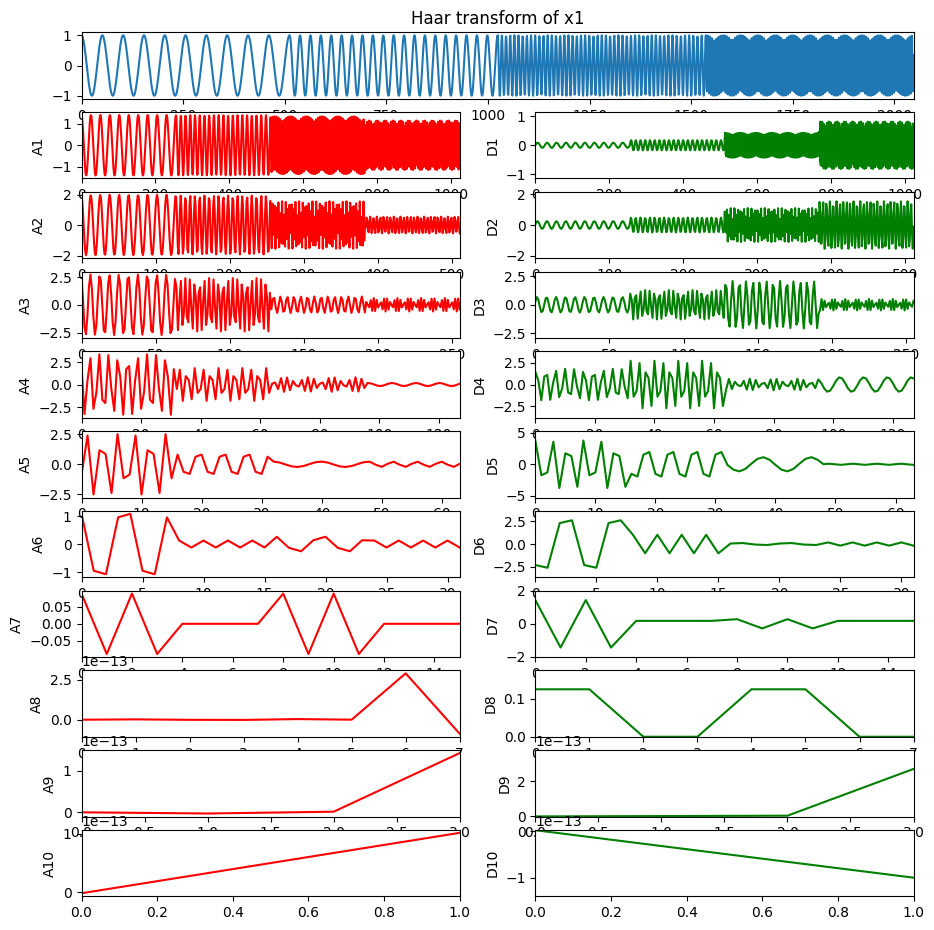

In [54]:
# display the decomposition of x1
plot_haar_coeffs(x1, 'Haar transform of x1', int(np.log2(len(x1)/2)))

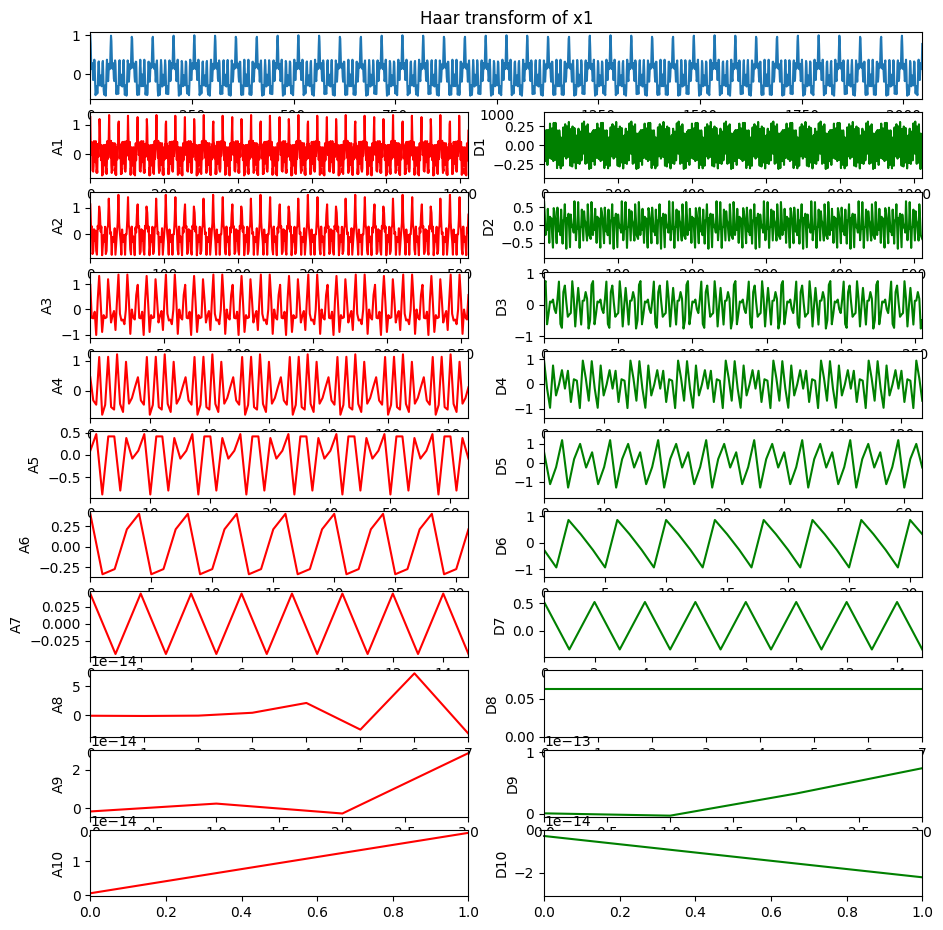

In [55]:
# display the decomposition of x2
plot_haar_coeffs(x2, 'Haar transform of x2', int(np.log2(len(x2)/2)))

<!-- END QUESTION -->

## Part III - Denoising

We will now use the different transforms defined in part I and II to perform denoising.
Let us create a noisy signal for this purpose.

In [56]:
angle1 = np.linspace(0, 5*np.pi/2, 300)
wave1  = np.sin(angle1)
angle2 = np.linspace(0, 3*np.pi/2, 300)
wave2  = np.sin(angle2)
angle3 = np.linspace(np.pi/2, 2*np.pi, 424)
wave3  = np.sin(angle3)
wave   = np.append(wave1, wave2)
wave   = np.append(wave, wave3)
wave_noisy = wave + 0.2*np.random.normal(0, 1, 1024)

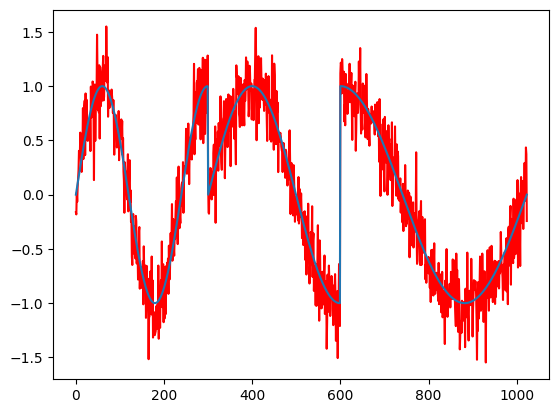

In [57]:
plt.plot(wave_noisy, 'r')
plt.plot(wave)
plt.show()

The noise is usually located in the higher frequencies. However, the signal we created is a bit special as it has two discontinuities which also generate high frequencies components (remember the Fourier transform of a rectangle function is a sinc). 

<!-- BEGIN QUESTION -->

14. Implement a function `denoise_signal` that perform denoising of the input signal by using a supplied orthonormal transform matrix, and by setting the transformed coefficients having an amplitude smaller than a given threshold to 0. You might want to use the [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function for this. When denoising using the Haar transform, you can preform the thresholding only on the detail coefficients. Implement the function `denoise_signal_haar` that performs this operation.

NB: The result returned should be real, in order to be displayed. 

In [58]:
def denoise_signal(W, x, threshold=0.1):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    """
    X = W@x
    X[np.abs(X) < threshold] = 0
    return np.real(W.conj().T@X)

In [59]:
def denoise_signal_haar(W, x, threshold=0.1, detail_start_index=256):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    detail_start_index: thresholding is performed on x[detail_start_index:]
    """
    X = W@x
    X[detail_start_index:] = np.where(np.abs(X[detail_start_index:]) < threshold, 0, X[detail_start_index:])
    return np.real(W.conj().T@X)

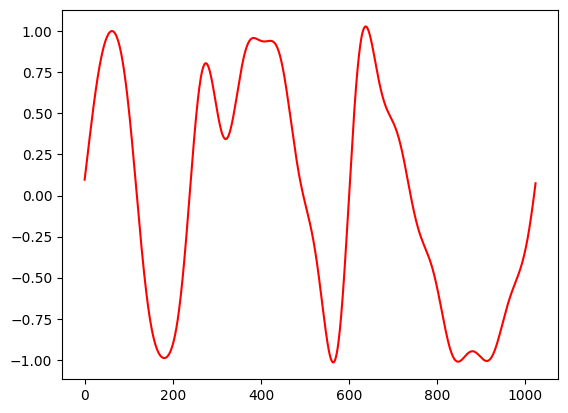

In [60]:
# Perform denoising with the full Fourier transform and display the result. 
# Make sure you choose a good threshold
x1_denoised = denoise_signal(get_fourier_matrix(len(wave_noisy)), wave_noisy, 1)
plt.plot(x1_denoised, 'r')
plt.show()

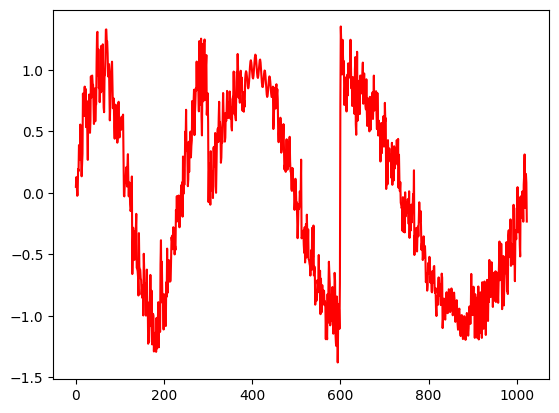

In [65]:
# Perform denoising with the block Fourier transform and display the result
# Make sure you choose a good threshold and block size
x2_denoised = denoise_signal(get_block_dft_matrix(len(wave_noisy), 64), wave_noisy, .32)
plt.plot(x2_denoised, 'r')
plt.show()

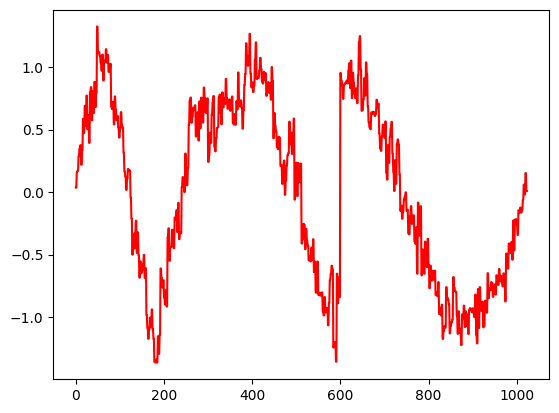

In [67]:
# Perform denoising with the Haar transform and display the result
# Make sure you choose a good threshold and an appropriate number of levels
x3_denoised = denoise_signal_haar(get_haar_matrix(len(wave_noisy), 5), wave_noisy, 2)
plt.plot(x3_denoised, 'r')
plt.show()

In [63]:
grader.check("q14")

q14 results: All test cases passed!
q14 - 1 message: Good, not denoising the noisy signal does not modify it.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

15. Compare the three denoising methods (Fourier, block Fourier and Haar). Which one performs better (in terms of noise removal but also in terms of discontinuity preservation) ? Was that expected (justify) ?

To get a continuous curve the fourier method seems the best, if we want to rebuild the original curve as well as possible including the discontinuities, the haar method is the most powerful one.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload your notebook and separate pdf for theoretical questions if needed

In [64]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q4 results: All test cases passed!
    q4 - 1 message: Good, your implementation returns correct results
    q4 - 2 message: Good, you did not use the scipy.linalg.dft function
    q4 - 3 message: Good, you did not use the scipy.fft.fft function
    q4 - 4 message: Good, you did not use the numpy.fft.fft function
    q4 - 5 message: Good, your implementation returns an orthogonal matrix
    q4 - 6 message: Good, you properly validated size before computing the result

    q6 results: All test cases passed!
    q6 - 1 message: Good, your implementation returns an orthogonal matrix
    q6 - 2 message: Good, you properly validated size before computing the result
    q6 - 3 message: Good, your implementation returns the correct result

    q10 results: All test cases passed!
    q10 - 1 message: Good, you properly validated size before computing 